Importing Necessary Library

In [77]:
#import required libraries 
import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from collections import Counter
import re
import string
import matplotlib.pyplot as plt

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Importing Dataset

In [78]:
#read data from dataset with file name 'IMDBDataset.csv'
file_path = 'IMDBDataset.csv'
data = pd.read_csv(file_path)


In [79]:
#displaying top 5 data from the dataset
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [54]:
#Grouping the sentiments of users and displaying no. of users based on sentiment
movieReview = pd.DataFrame(data.groupby('sentiment').size().sort_values(ascending=False).rename('No of Users').reset_index())
movieReview.head()

,sentiment,No of Users
0,positive,25000
1,negative,25000


In [55]:
#preprocessing- ignore useless words
stopWords = set(stopwords.words('english')) 

In [56]:
def clean_review(review):
    punctuation = string.punctuation
    replace_punc = ''.join([' ' for s in punctuation])
    review_link_clean = re.sub(r'http\S+', '', review) #regular expression
    review_remove_and = re.sub(r'&\S+', '', review_link_clean)
    review_remove_at = re.sub(r'@\S+', '', review_remove_and)
    review_clean = review_remove_at.replace('-', ' ')
    review_alphas = re.sub(r'\W +', ' ', review_clean)
    trans_table = str.maketrans(punctuation, replace_punc)
    review_clean = ' '.join([word.translate(trans_table) for word in review_alphas.split(' ')])
    review_clean = review_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    review_clean = ([p.sub("", x).strip() for x in review_clean])
    review_clean = [word.lower() for word in review_clean if len(word) > 2]
    review_clean = ([i for i in review_clean if i not in stopWords])
    review_clean = ([p.sub("", x).strip() for x in review_clean])
    return review_clean

In [57]:
review_clean = [clean_review(doc) for doc in data['review']]
sentences = [' '.join(r) for r in review_clean]


In [58]:
#Adding new column cleantext with sentences as values
data['cleantext']=sentences
data.head()

,review,sentiment,cleantext
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching episode hooke...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


In [59]:
#Function to check the top words in the dataset
def top_words(data):
        words_list = data.split(' ')
        counts = Counter(words_list)
        top_words = counts.most_common(20)
        length_of_list = len(top_words)
        index = np.arange(length_of_list)
        print(top_words)
        count_values = [x[1] for x in top_words]
        count_words = [x[0] for x in top_words]
        fig = plt.figure(figsize = (16,9))
        bar_width = 0.4
        rects1 = plt.bar(index, count_values)
        plt.xticks(index + bar_width, count_words, rotation=0)
        plt.show()

Top words in Positive Sentiment
[('film', 42101), ('movie', 37850), ('one', 27318), ('like', 17709), ('good', 15025), ('great', 12964), ('story', 12934), ('time', 12750), ('well', 12721), ('see', 12273), ('also', 10793), ('really', 10740), ('would', 10595), ('even', 9615), ('first', 9227), ('much', 9198), ('people', 8717), ('love', 8692), ('best', 8508), ('get', 8285)]


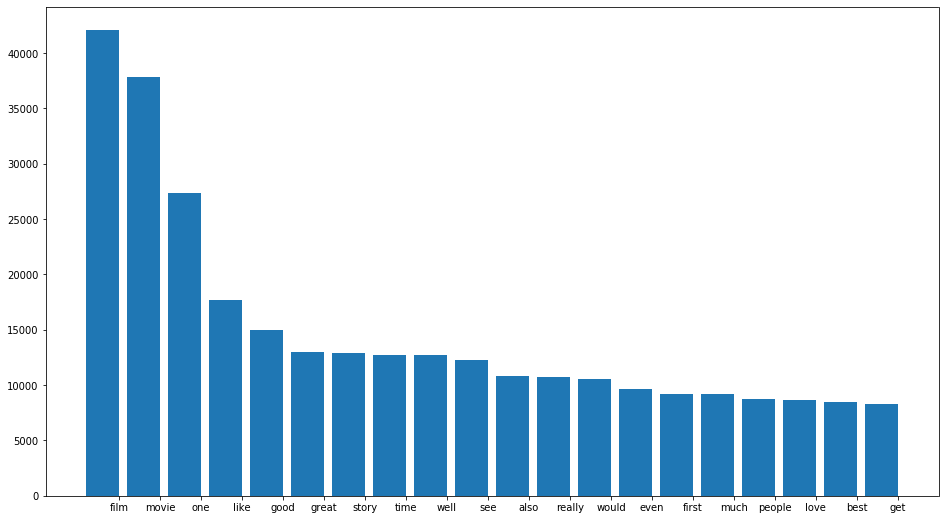

In [60]:
#Getting the positive_words and list them
train_positive_sentiment = data[data.sentiment == "positive"]
positive_words = ' '.join(train_positive_sentiment['cleantext'])
print("Top words in Positive Sentiment")
top_words(positive_words)

Top words in Negative Sentiment
[('movie', 50113), ('film', 37586), ('one', 26276), ('like', 22455), ('even', 15249), ('good', 14728), ('bad', 14724), ('would', 14007), ('really', 12354), ('time', 12353), ('see', 10753), ('story', 10185), ('get', 10134), ('much', 10118), ('people', 9465), ('make', 9355), ('could', 9301), ('made', 8801), ('well', 8534), ('first', 8352)]


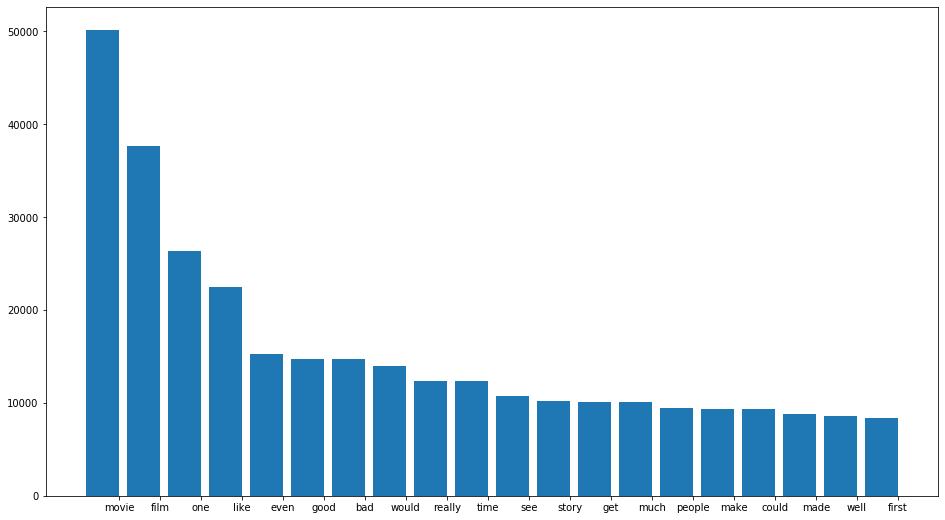

In [61]:
#Getting the negative_words and list them
train_positive_sentiment = data[data.sentiment == "negative"]
positive_words = ' '.join(train_positive_sentiment['cleantext'])
print("Top words in Negative Sentiment")
top_words(positive_words)

In [62]:
#Splitting the train and test values
from sklearn.model_selection import train_test_split

X = data.cleantext
y = data.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
#Vectorization of train vector
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train)

In [64]:
#Counting the sentiment
counts = data.sentiment.value_counts()
print(counts)

negative    25000
positive    25000
Name: sentiment, dtype: int64


In [65]:
#Fitting the sample into the model
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train_vect, y_train)

In [66]:
#Using naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

nb.score(X_train_res, y_train_res)

0.842800857812578

In [67]:
#Transforming the vector and predicting using naive bayes
X_test_vect = vect.transform(X_test)
y_pred = nb.predict(X_test_vect)
y_pred

array(['negative', 'positive', 'positive', ..., 'negative', 'positive',
       'negative'], dtype='<U8')

In [68]:
#Displaying the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 84.19%

COnfusion Matrix:
 [[4204  847]
 [ 734 4215]]


In [73]:
#Passing the test data and predicting the sentiment for the text
test_data = input("Enter Review:")
label_data = nb.predict(vect.transform([test_data]))

print("label:", label_data)
if label_data==['positive']:
    print ("Positive")
else: 
    print("Negative")


Enter Review:Worst Movie
label: ['negative']
Negative
